In [1]:
from arty.core.filter.color import visualize_color_set
from arty.sbr.preset import Preset
from arty.sbr.image_painter import ImagePainter, IrregularBrushImagePainter
import cv2

In [2]:
# import cv2

preset = Preset(
                # stroke_scale=6,
                stroke_scale=1,
                layer_scales = [8, 4, 2],

                gradient_smoothing_radius=15,
                # length_scale=1/5,
                length_scale=1/5,
                brush_type="ellipse",
                gradient_type="sharr",
                gradient_smoothing_type="gaussian",
                smoothing_iterations=1,
                length_type="base",
                length_first_flag=True,
                grid_scale=3,
                grayscale=False,
                has_cardboard=False,
                palette_size=45,
                # img_path="../_demo/images/street.jpg"
)

import yaml

with open(preset.preset_save_path, 'w') as file:
    yaml.dump(preset.__dict__, file)

# with open("../configs/presets/sbr/ellipse/189.yaml") as file:
#     preset = Preset(**{k: v for k, v in yaml.load(file, Loader=yaml.FullLoader).items() if
#                        k not in ["img_save_path", "preset_save_path"]})

sharr
Painting image with multiple layers...
Computing color set...
Extending color color set...
Computing gradient...
sharr gaussian 15 1
Painting layer 1 with stroke scale 8...


100%|██████████| 2/2 [00:00<00:00, 11.57it/s]


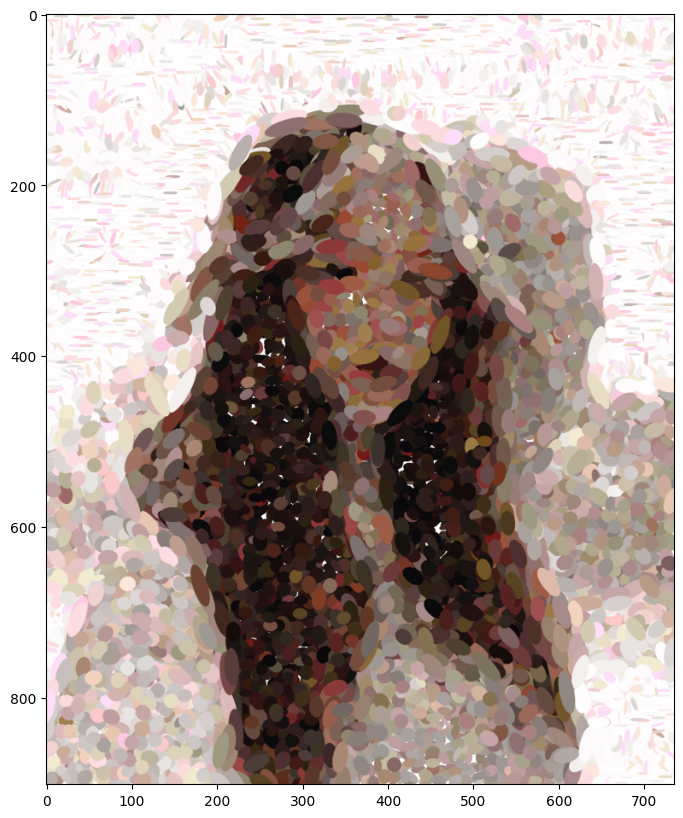

Painting layer 2 with stroke scale 4...


100%|██████████| 5/5 [00:00<00:00,  8.61it/s]


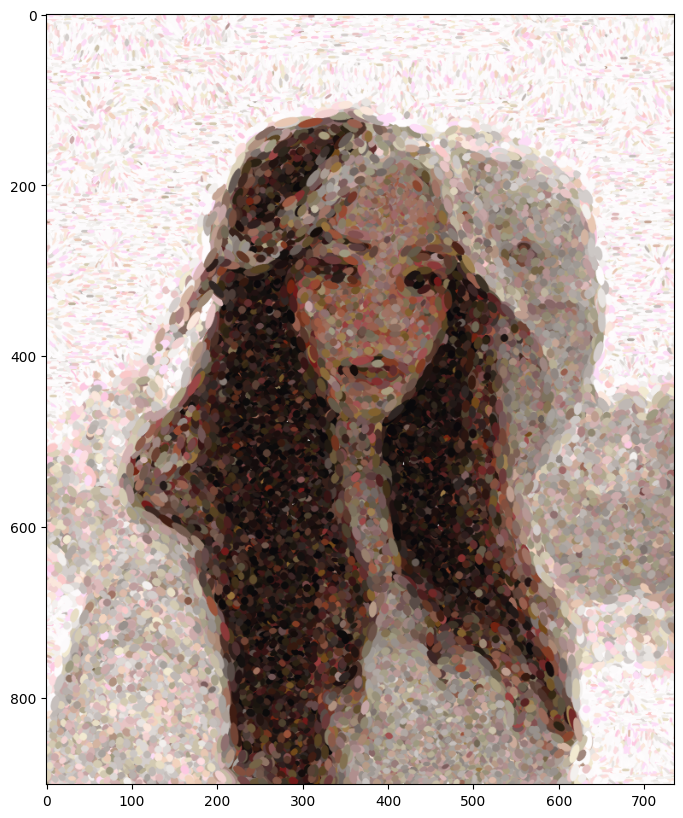

Painting layer 3 with stroke scale 2...


100%|██████████| 17/17 [00:02<00:00,  7.42it/s]


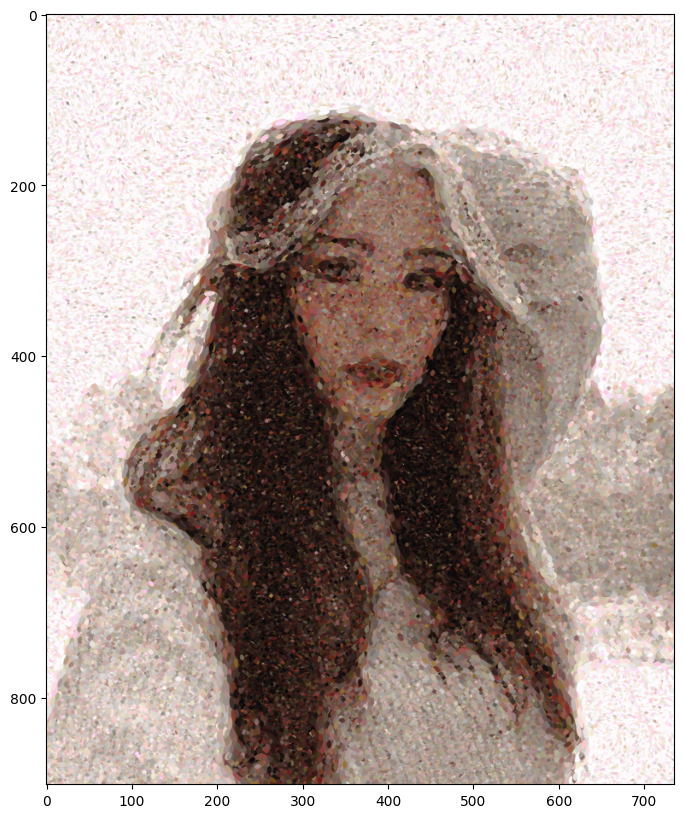

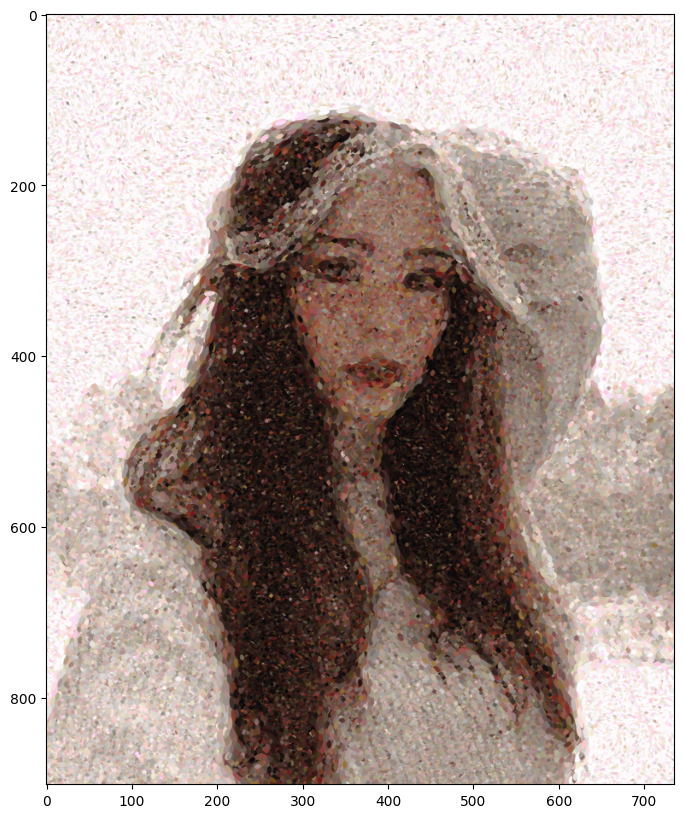

In [3]:
img = cv2.imread("../_demo/images/img.png")


painter = ImagePainter(img, preset)
print(painter.preset.gradient_type)
result = painter.paint()
cv2.imwrite(preset.img_save_path, result)
painter.show_result()

Smoothing:  none
sharr
Computing gradient...
sharr none 15 1
Painting with multiple layers...
Computing gradient...
luminance
sharr none 15 1
Painting layer 1 with brush size 128...


100%|██████████| 884/884 [00:01<00:00, 669.19it/s]


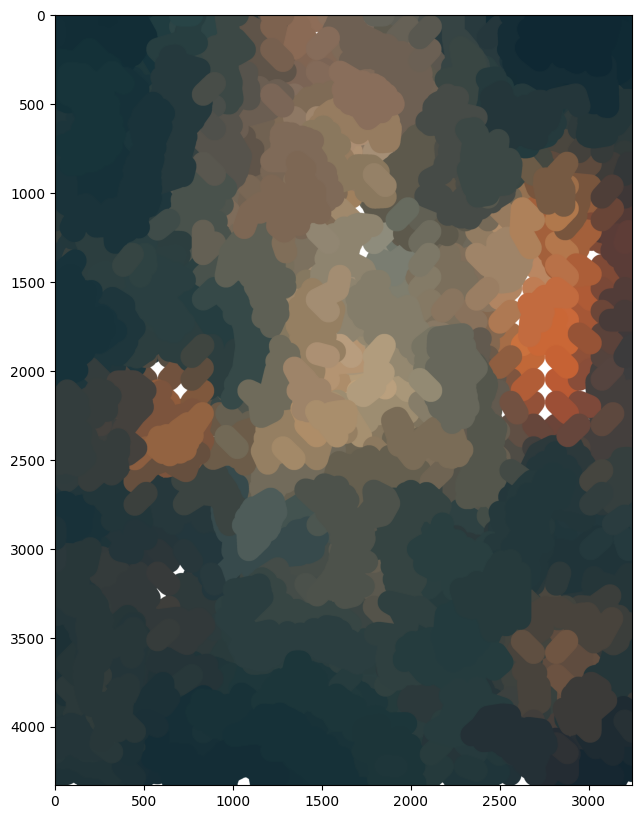

Painting layer 2 with brush size 64...


100%|██████████| 3468/3468 [00:05<00:00, 587.59it/s]


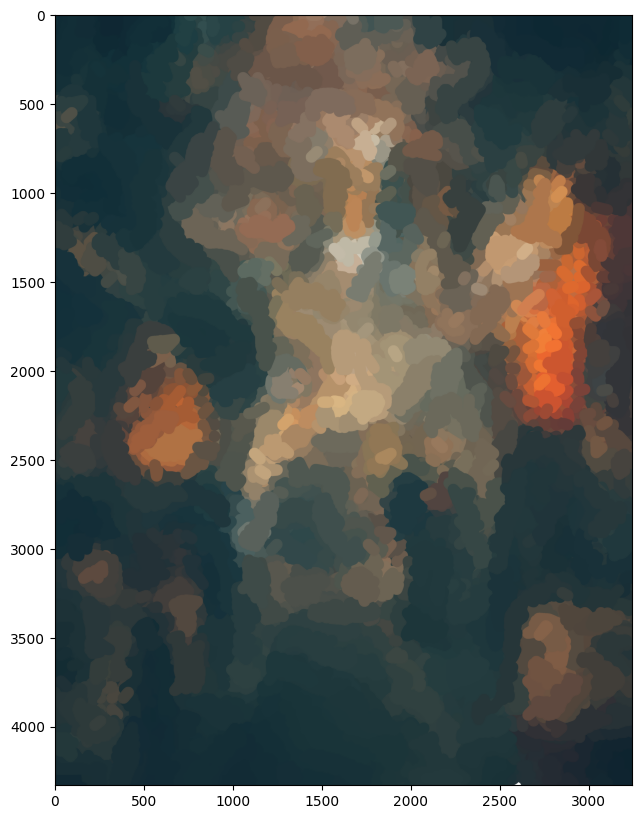

Painting layer 3 with brush size 32...


100%|██████████| 13872/13872 [00:24<00:00, 572.99it/s]


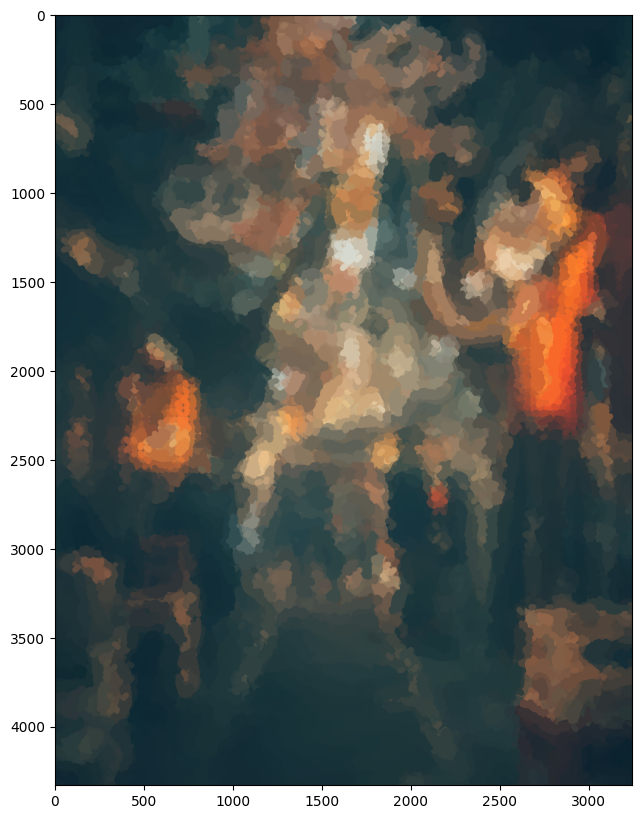

Painting layer 4 with brush size 16...


100%|██████████| 55013/55013 [01:47<00:00, 509.90it/s]


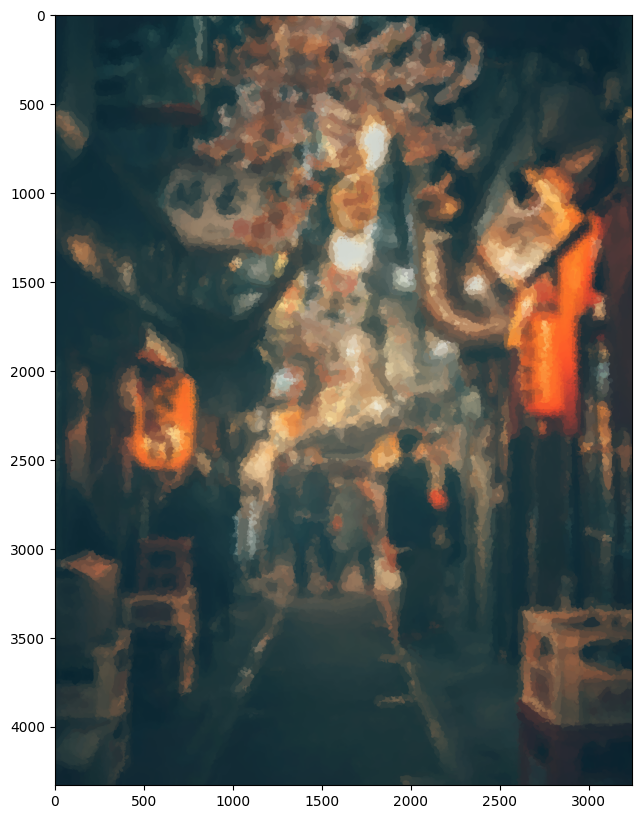

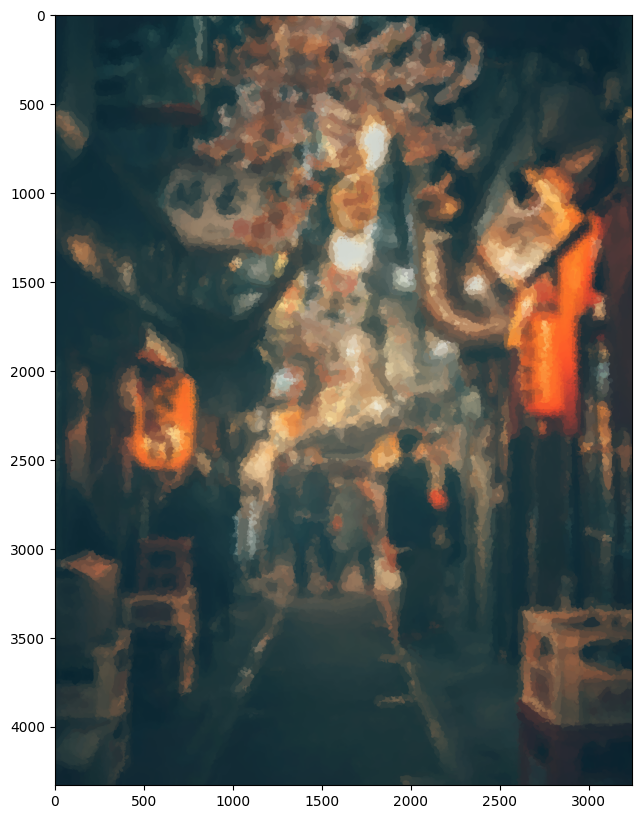

In [8]:
# class Preset:
#     def __init__(self):
#         self.stroke_scale=5
#         self.gradient_smoothing_radius=15
#         self.length_scale=1/4,
#         self.brush_type="ellipse",
#         self.gradient_type="sharr",
#         self.gradient_smoothing_type="none",
#         self.smoothing_iterations=1,
#         self.length_type="base",
#         self.length_first_flag=True,
#         self.grid_scale=3,
#         self.grayscale=False,
#         self.has_cardboard=False,
#         self.palette_size=45,
#         self.grayscale=False

preset = Preset(
                stroke_scale=5,
                gradient_smoothing_radius=15,
                length_scale=1/4,
                brush_type="ellipse",
                gradient_type="sharr",
                gradient_smoothing_type="none",
                smoothing_iterations=1,
                length_type="base",
                length_first_flag=True,
                grid_scale=3,
                grayscale=False,
                has_cardboard=False,
                palette_size=45,
                # img_path="../_demo/images/street.jpg"
)
        
class PresetAdv:
    def __init__(self):
        # self.brush_sizes = [256, 128, 64]
        # self.brush_sizes = [32, 16, 8, 4, 2]
        self.brush_sizes = [128, 64, 32, 16]
        self.blur_factor = 1
        self.min_stroke_length = 5
        self.max_stroke_length = 150

image = cv2.imread("../_demo/images/street.jpg")
# mask = cv2.imread("../_demo/images/mask1.png", cv2.IMREAD_GRAYSCALE)
# make lower resolution
# image = cv2.resize(image, (image.shape[1]//3, image.shape[0]//3))
# preset = Preset()
preset_adv = PresetAdv()
painter = IrregularBrushImagePainter(image, preset, preset_adv)
print(painter.preset.gradient_type)
painter.compute_gradient()
result = painter.paint()
painter.show_result()


In [6]:
# cv2.imshow("result", mask)

In [9]:
cv2.imwrite("sbr/multi-layer/23.jpg", painter.result)

True